In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline 
# plt.rcParams['figure.figsize'] = [20.0, 10.0] # Plot size 조정

In [2]:
boarding_pop_by_subway = pd.read_csv('./data/boarding_pop_by_subway.csv', encoding='utf-8', header=0)
no_data = pd.read_csv('./data/no_data.csv', encoding='utf-8', header=0)
out_of_seoul_stations = pd.read_csv('./data/out_of_seoul_stations.csv', encoding='utf-8', header=0)
skt_floating_pop = pd.read_csv('./data/skt_floating_pop.csv', encoding='utf-8', header=0)
subway = pd.read_csv('./data/subway.csv', encoding='utf-8', header=0)

seoul_boarding_pop_by_subway = pd.read_csv('./data/seoul_boarding_pop_by_subway.csv', engine = 'python', encoding='utf-8', header=0)

boarding_pop_by_subway
objects = pd.read_csv('./data/objects.csv', encoding='utf-8', header=None, names=['ID', '20남', '30남', '40남', '50남', '6-70남', '20여', '30여', '40여', '50여', '6-70여'])

In [3]:
# [datetime, line, station, 04시-05시 승차인원, 04-05시 하차인원, ... 작업일자,ID,gu]
df = objects
df = df.drop(labels=['ID'], axis='columns')
df

,20남,30남,40남,50남,6-70남,20여,30여,40여,50여,6-70여
0,8115.686815,10554.018460,11412.989438,10401.025724,9327.534119,9183.633494,8908.472052,9240.380141,8784.669110,10291.090648
1,12448.921340,18415.790564,19390.622316,16962.820328,15313.030138,15874.355759,16334.074905,15624.082920,14291.422893,14790.878838
2,10428.704853,12763.518598,12983.126334,11469.468990,10039.749714,12472.165877,10905.078647,10490.138571,9695.771410,10408.777007
3,5433.442450,5220.376021,5185.364287,4940.982084,4956.954188,5673.390425,4452.746963,4757.310944,4686.121710,5885.810928
4,4041.845655,5448.640398,5891.516589,5309.761925,4664.157931,4630.050924,4587.111415,4694.754267,4409.149804,5079.011091
...,...,...,...,...,...,...,...,...,...,...
1499,1669.231571,1969.556740,1976.448007,2103.321270,2218.246485,1677.162993,1895.225682,2030.276278,2276.185724,2688.845250
1500,22706.225083,19811.777841,19892.142059,19675.766497,23357.464100,21745.618381,19091.202091,19749.489383,21107.061582,28801.752982
1501,24189.821406,20467.480841,21317.084562,21785.958568,26931.774486,22798.312043,19977.973936,21665.300904,23438.039888,33027.253365
1502,22620.724251,19835.000725,20601.746403,20830.338472,25196.545168,21234.185875,19059.504051,20418.767817,22096.856145,30448.331094


[[  3881.22815223   4651.90349239   4651.10537103   4127.20815742
    4245.8397427    4150.66546844   4538.15861113   4539.28967231
    4348.75488743   5229.28772606]
 [ 23314.32481017  33061.42609344  32934.30654656  27351.20714567
   23802.06005315  27744.38954846  30165.29941532  27253.59899395
   24688.6522654   26348.86416014]
 [ 12118.67561158  12499.39531853  12372.84880045  11656.11466656
   12820.89982411  12194.22015684  12580.4052363   13166.29326947
   13276.47493907  16288.29015461]
 [ 60915.92589819  60548.98353361  49002.34666231  42618.49354983
   50989.93584692  60218.8060528   55177.32488653  47631.44966679
   49308.75978192  65304.2241211 ]
 [ 22202.92859542  21291.16012052  20589.45416356  19860.74173196
   24242.16181335  21213.4386117   21560.59253636  22996.82573247
   23965.37681748  31423.33303506]
 [ 37095.02106835  41737.42011333  39667.53789349  36529.15205748
   40499.39003965  37524.89187933  39916.59297552  39805.23203931
   40880.69462776  50957.87980578

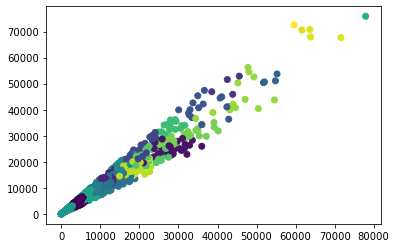

In [4]:

df_data = df

k_group = [20] # Choose k range
for k in k_group:
    km = KMeans(n_clusters = k, random_state = 0); # Initial value => random_state attr.
    km.fit(df_data); # Commit clustering
    result = km.predict(df_data);
    
    # TODO : normalization
    """
    유동인구 중 최대치로 모두를 나누기 ... 작은 숫자가 너무 작을 수 있음
    """
    
    print(km.cluster_centers_); # Print center
    # result[15] # Find cluster where the item belongs
    plt.scatter(df['50남'], df['50여'], c = result); # 점 plot 실행
    plt.show();